<a href="https://colab.research.google.com/github/Riiishaab/OS-Detection-/blob/main/Lab_1_MLEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
import pandas as pd

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Load the dataset (assuming CSV format for simplicity)
data_path = '/content/drive/MyDrive/data.csv'  # Path to your CSV file
df = pd.read_csv(data_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,13.6,19.599,10.435,2.068,7.936,1.943,2.938,86.582,8.482518927
0,9.4,12.531,6.301,3.150,10.003,2.477,2.317,40.537,6.521799
1,7.6,11.188,4.934,3.664,11.287,2.653,3.862,32.869,6.171909
2,6.1,9.701,4.113,4.465,12.667,2.897,4.569,25.476,5.944111
3,11.5,12.275,7.416,1.821,4.170,2.227,3.156,61.943,6.968568
4,8.5,7.281,4.460,2.604,5.186,2.721,2.408,31.965,5.666081


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Array

In [ ]:
split_percent = 0.7
split_index = int(len(X) * split_percent)
X = np.asarray(X)
y = np.asarray(y)

# Normalization of Inputs

In [ ]:
# Normalize input features (X) and target values (y)
num_samples = X.shape[0]  # Get the number of samples

# Normalizing input features (X)
feature_min = np.min(X, axis=0)
feature_max = np.max(X, axis=0)
X_scaled = (X - feature_min) / (feature_max - feature_min)

# Normalizing target values (y)
target_min = np.min(y, axis=0)
target_max = np.max(y, axis=0)
y_scaled = (y - target_min) / (target_max - target_min)

# Split

In [ ]:
X_train = X_scaled[:split_index]
y_train = y_scaled[:split_index]
X_test = X_scaled[split_index:]
y_test = y_scaled[split_index:]

In [ ]:
print(f'X_train_shape = {X_train.shape}')
print(f'y_train_shape = {y_train.shape}')
print(f'X_test_shape = {X_test.shape}')
print(f'y_test_shape = {y_test.shape}')

X_train_shape = (56, 8)
y_train_shape = (56,)
X_test_shape = (25, 8)
y_test_shape = (25,)


# **Errors**

### MAE Loss/Error

In [ ]:
def mean_abs_error(y_pred,y):
  L = np.sum(abs(y_pred-y))/len(y)
  return L

### MSE Loss/Error

In [ ]:
def mean_sq_error(y_pred,y):
  L = np.sum((y_pred-y)**2)/len(y)
  return L

### R_Square

In [ ]:
def r_square(y_pred,y):
  SSR = np.sum((y_pred-y)**2)
  SST = np.sum(y-np.mean(y)**2)
  R = 1-(SSR/SST)
  return R

### Corelation Coefficient

In [ ]:
import numpy as np

def corr_coefficient(y_pred, y):
    y_mean = np.mean(y)
    y_pred_mean = np.mean(y_pred)

    numerator = np.sum((y - y_mean) * (y_pred - y_pred_mean))
    denominator = np.sqrt(np.sum((y - y_mean) ** 2)) * np.sqrt(np.sum((y_pred - y_pred_mean) ** 2))

    corr = numerator / denominator
    return corr

## Overall Error Function and Graph

In [ ]:
def errors(y_pred,y):

  mae = mean_abs_error(y_pred,y)
  print(f'Mean Absolute Error is {mae}')
  mse = mean_sq_error(y_pred,y)
  print(f'Mean Square Error is {mse}')
  R2 = r_square(y_pred,y)
  print(f'R Square Error is {R2}')
  corr = corr_coefficient(y_pred,y)
  print(f'Correlation Coefficient is {corr}')

  plt.figure(figsize=(8,6))
  plt.plot(y,label='Actual Output',color='blue',marker = 'o')
  plt.plot(y_pred,label = 'Predicted Output',color='red',marker='x')
  plt.xlabel('Sample Index')
  plt.ylabel('Output Value')
  plt.title('Predicted vs Actual Output (Line Plot)')
  plt.legend()
  plt.show()

# Cost Function

In [ ]:
def cost_function(X,y,w):
  y_pred = np.dot(X,w.T)
  J = (1 / (2 * len(y))) * np.sum((y_pred - y) ** 2)
  return J

# Batch Gradient Decent

In [ ]:
def batch_gradient_decent(X,y,w,alpha,iner):
  cost_history = np.zeros(iter)
  for i in range(iter):
    w = w - (alpha/len(y))*np.dot((np.dot(X,w.T)-y).T,X)
    cost_history[i] = cost_function(X,y,w)
  return w,cost_history


# Stochastic gradient descent

In [ ]:
def stochastic_gradient_descent(X, y, w, alpha, iters):
    cost_history = np.zeros(iters)  # Initialize cost history
    for i in range(iters):

        rand_index = np.random.randint(len(y))

        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]

        w = w - alpha * np.dot((np.dot(ind_x, w.T) - ind_y), ind_x)

        cost_history[i] = cost_function(ind_x, ind_y, w)

    return w, cost_history

# Mini-batch gradient descent

In [ ]:
def mini_batch_gradient_descent(X, y, w, alpha, batch_size, iters):
    cost_history = np.zeros(iters)
    for i in range(iters):
      a = np.random.randint(len(y)-batch_size)
      x_mb = X[a:a+batch_size]
      y_mb = y[a:a+batch_size]
      w = w - (alpha/batch_size)*np.dot(x_mb.T,np.dot(x_mb,w)-y_mb)
      cost_history[i] = cost_function(x_mb,y_mb,w)
    return w,cost_history

# Batch Gradient Decent Operation

In [ ]:
w = np.zeros(X_scaled.shape[1])
w.shape

(8,)

In [ ]:
alpha = 0.4
iter = 1500
batch_w,batch_J = batch_gradient_decent(X_train,y_train,w,alpha,iter)

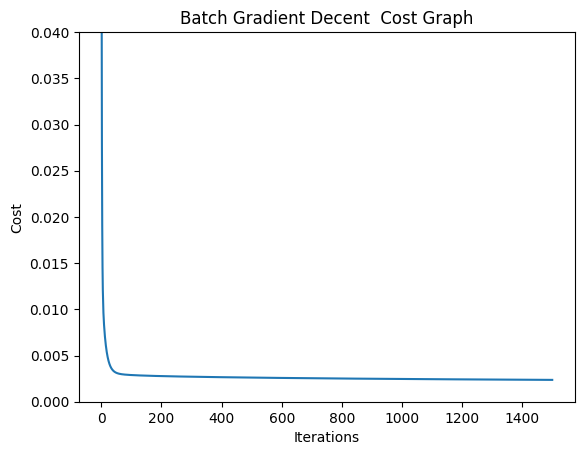

In [ ]:
plt.plot(range(iter),batch_J)
plt.ylim(0,0.040)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Batch Gradient Decent  Cost Graph')
plt.show()

In [ ]:
print(f'Batch Weight = {batch_w}')
y_pred = np.dot(X_test,batch_w.T)
y_pred_unnormalized = y_pred*(target_max - target_min) + target_min
y_unnormalized = y_test*(target_max - target_min) + target_min

Batch Weight = [ 0.52920193  0.76175664  0.0507667   0.04850951  0.05558516  0.13039409
  0.18895117 -0.00177321]


Mean Absolute Error is 0.6085657107406603
Mean Square Error is 0.6355113150705715
R Square Error is 1.035806158667882
Correlation Coefficient is 0.8039779028221331


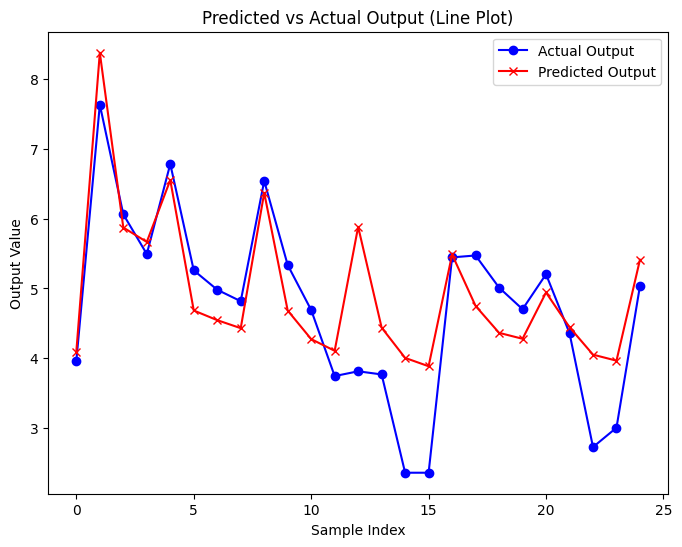

In [ ]:
BGD = errors(y_pred_unnormalized,y_unnormalized)

## Stochastic Gradient Decent Operation

In [ ]:
w = np.zeros(X_scaled.shape[1])
w.shape

(8,)

In [ ]:
alpha = 0.4
iter = 5000
stochastic_w,stochastic_J = stochastic_gradient_descent(X_train,y_train,w,alpha,iter)

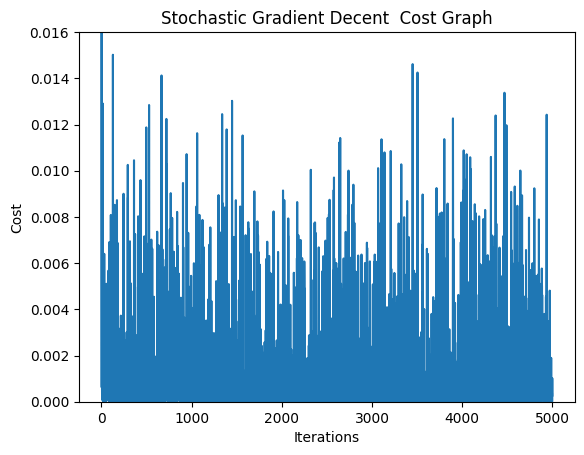

In [ ]:
plt.plot(range(iter),stochastic_J)
plt.ylim(0,0.016)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Decent  Cost Graph')
plt.show()

In [ ]:
print(f'Batch Weight = {stochastic_w}')
y_pred = np.dot(X_test,stochastic_w.T)
y_pred_unnormalized = y_pred*(target_max - target_min) + target_min
y_unnormalized = y_test*(target_max - target_min) + target_min

Batch Weight = [ 0.52992732  1.16856558 -0.40031241 -0.00164342  0.03457543  0.16158474
  0.21897617 -0.023735  ]


Mean Absolute Error is 0.6119063222576642
Mean Square Error is 0.6462010825175565
R Square Error is 1.0364084445757056
Correlation Coefficient is 0.8034639982106881


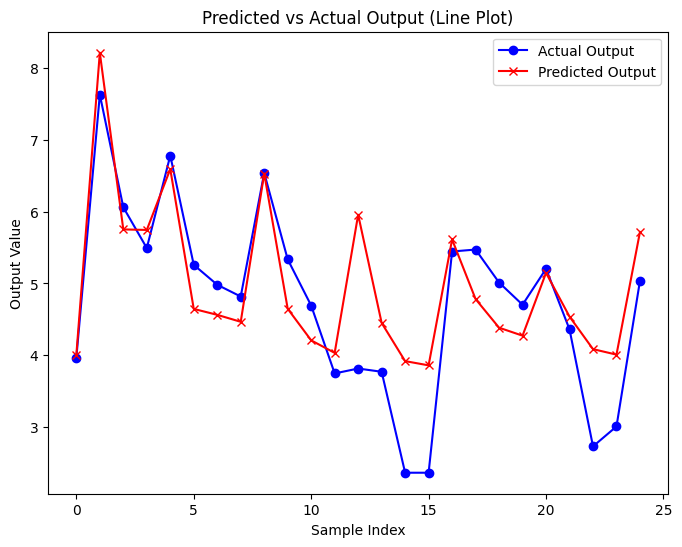

In [ ]:
SGD = errors(y_pred_unnormalized,y_unnormalized)

## Mini Batch Gradient Decent

In [ ]:
w = np.zeros(X_scaled.shape[1])
w.shape

(8,)

In [ ]:
alpha = 0.4
iter = 2000
mini_batch_w,mini_batch_J = mini_batch_gradient_descent(X_train,y_train,w,alpha,15,iter)

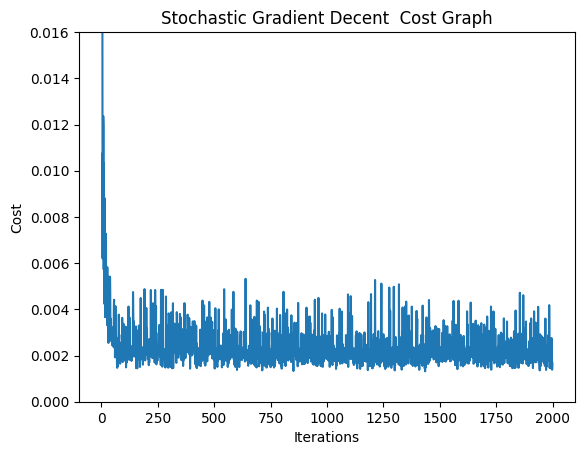

In [ ]:
plt.plot(range(iter),mini_batch_J)
plt.ylim(0,0.016)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Decent  Cost Graph')
plt.show()

In [ ]:
print(f'Batch Weight = {mini_batch_w}')
y_pred = np.dot(X_test,mini_batch_w.T)
y_pred_unnormalized = y_pred*(target_max - target_min) + target_min
y_unnormalized = y_test*(target_max - target_min) + target_min

Batch Weight = [ 0.46311954  0.75773716  0.22742487  0.11020661  0.0136025   0.15528384
  0.17580134 -0.01906885]


Mean Absolute Error is 0.6689349165232507
Mean Square Error is 0.8386372545117459
R Square Error is 1.0472507379298353
Correlation Coefficient is 0.7902845982909456


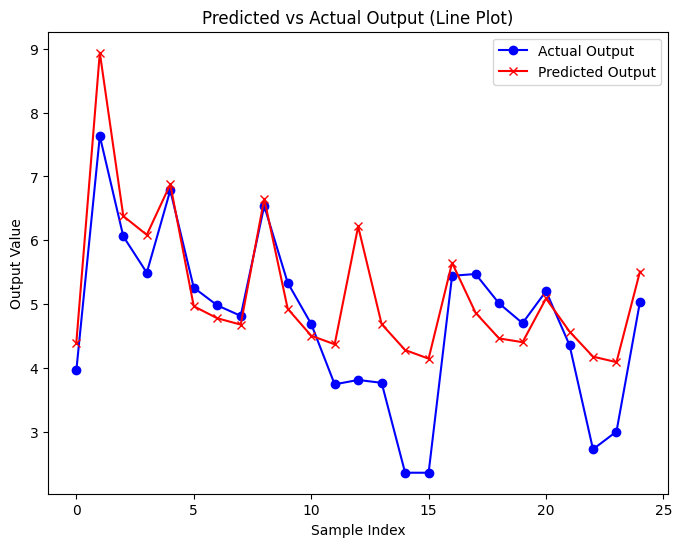

In [ ]:
MBGD = errors(y_pred_unnormalized,y_unnormalized)